In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Breif about Data : Data is about Human resources in a specific company each record represents an employee. The source of Dataset:https://www.kaggle.com/jacksonchou/hr-data-for-analytics

Variables description:
1) satisfaction_level : means how much employee satisfied (0 less satisfied , 1 most satisfied),
2) last_evaluation : means employees' evaluation for last month (0 bad , 1 Excellent), 
3) number_project : number of projects the employee worked on ,
4) average_montly_hours : average months employee spends at work per month ,
5) time_spend_company : years the employee spent in a company ,
6) Work_accident : 0 if he did not have an accident , 1 if had at least one ,
7)left:0 if employee did not leave,1 if left company,
8)promotion_last_5years : 0 if he did not have any promotion in last 5 years,1 if had at least ones,
9)sales : department in which employee works,
10)salary: Salary

**Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the dataset**

In [4]:
df=pd.read_csv(r"/content/gdrive/My Drive/HR DATASET/HR_comma_sep.csv")

In [5]:
display(pd.DataFrame(df))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
df=df.rename(columns={'sales': 'department'})

**Basic understanding of data and EDA**

In [6]:
df.shape

(14999, 10)

In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [19]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


**UNIVARAITE**

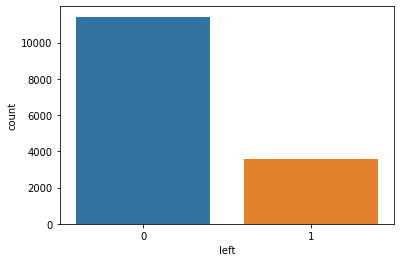

In [20]:
import warnings
warnings.filterwarnings('ignore')
df['left'].value_counts()
sns.countplot(df.left)

In [21]:
print(df.salary.unique())

['low' 'medium' 'high']


In [22]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [23]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

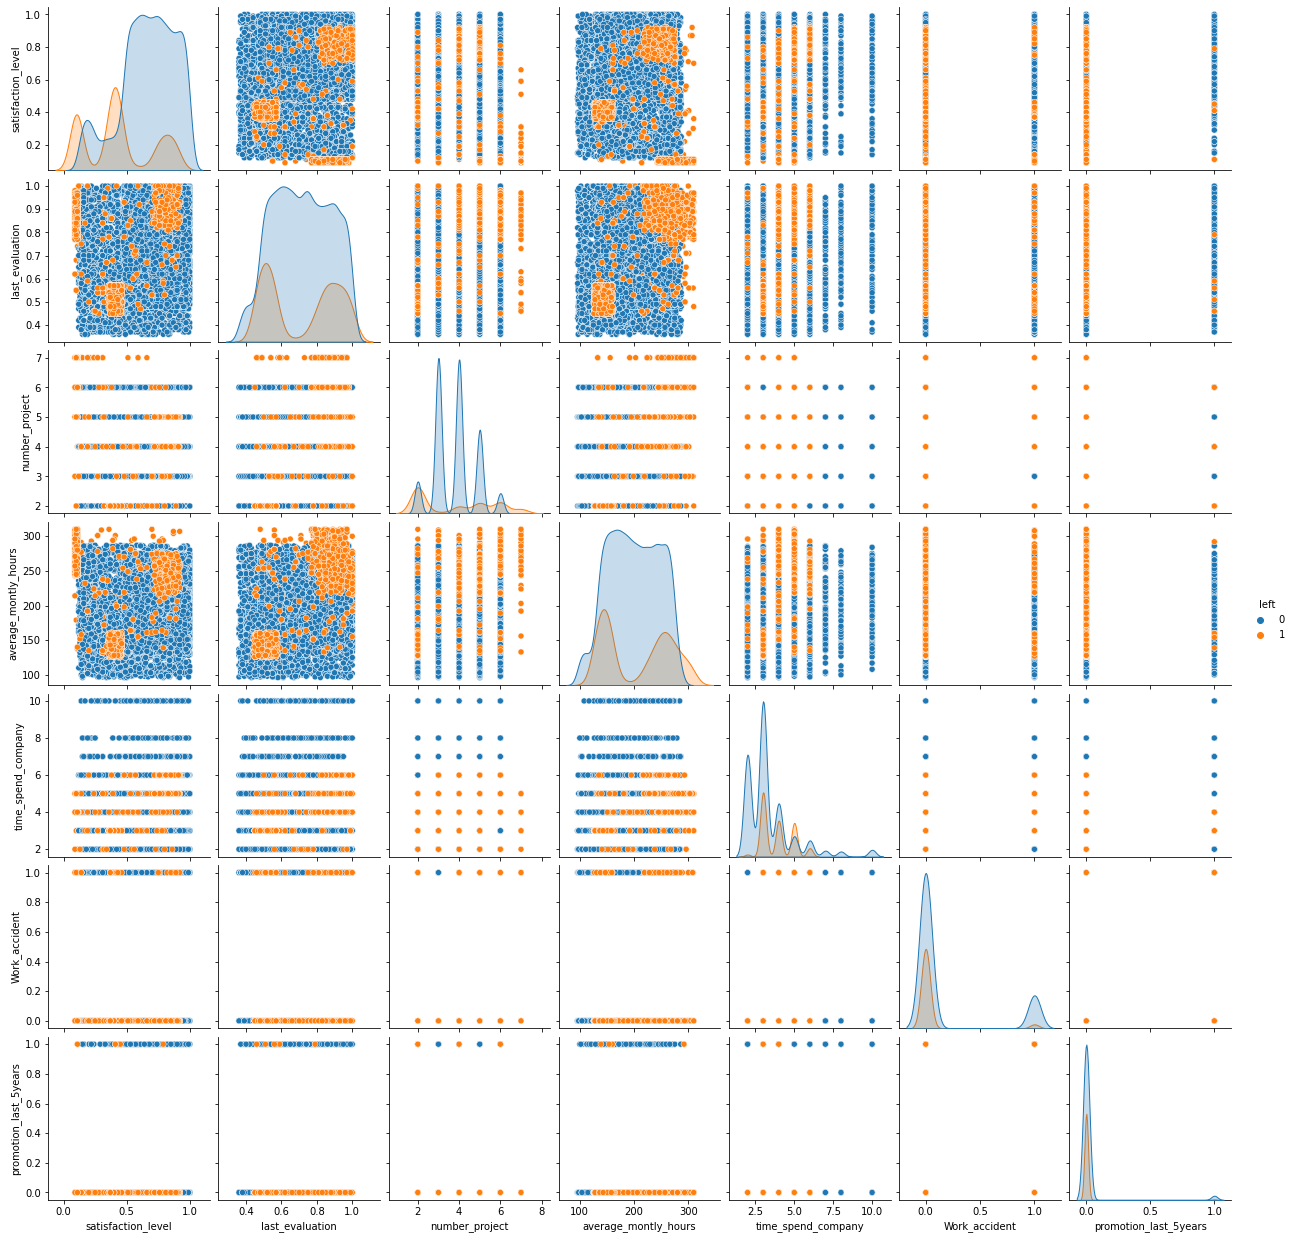

In [24]:
sns.pairplot(df,hue='left')

**Bivariate**

In [25]:
pd.crosstab(df['department'],df['salary']).style.background_gradient('summer_r')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Text(0.5, 0, 'Department')

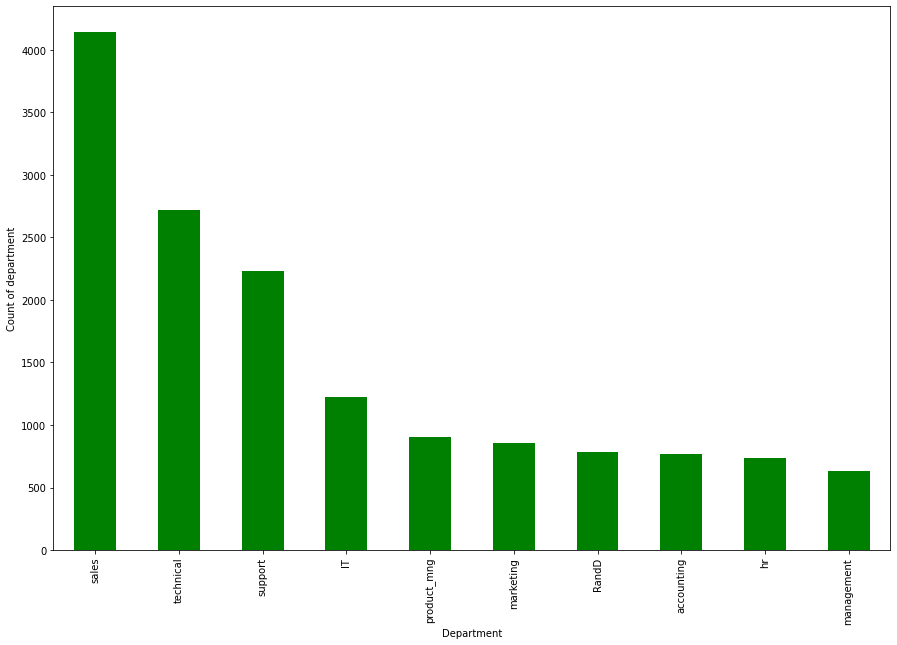

In [26]:
plt.rcParams['figure.figsize']=(15,10)
df['department'].value_counts().plot(kind='bar',color='green')

plt.ylabel('Count of department')
plt.xlabel('Department')

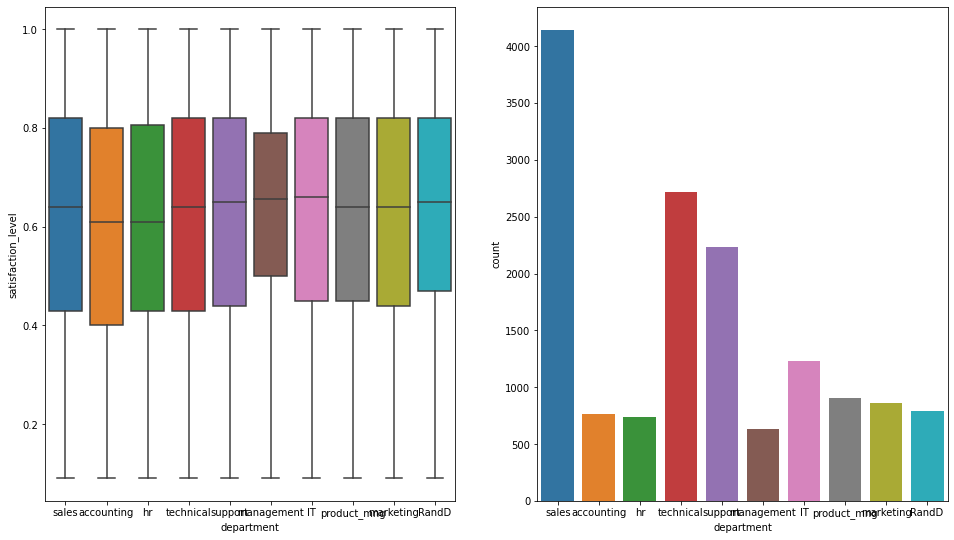

In [27]:
plt.rcParams['figure.figsize']=(25,20)
plt.subplot(2,3,1)
sns.boxplot(y=df['satisfaction_level'],x=df['department'])

plt.subplot(2,3,2)
sns.countplot(df['department'])

**Number of Projects vs Average Monthly Hours**

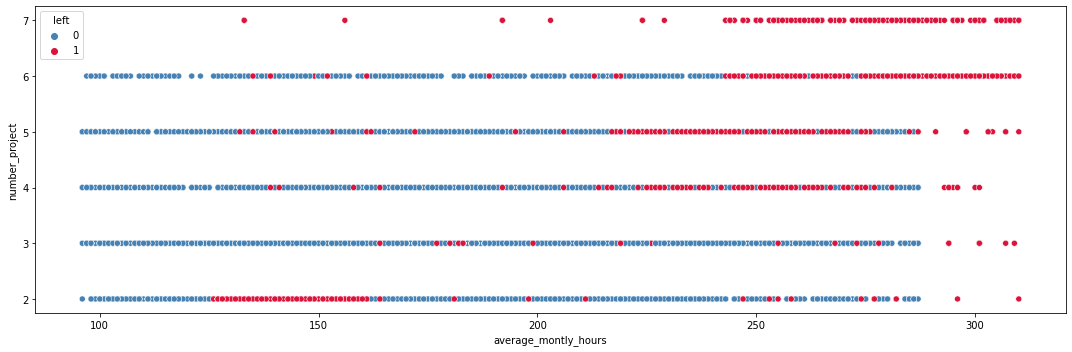

In [29]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.average_montly_hours,
            y=df.number_project,
            hue=df.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

It appears that:

employees with more than 4 projects and working more than 217 hours tend to leave the company. employees with less than 3 projects and working less than 161 hours tend to leave the company. A high or a low workload seem to push employees out.

**Last Evaluation vs Satisfaction Level**

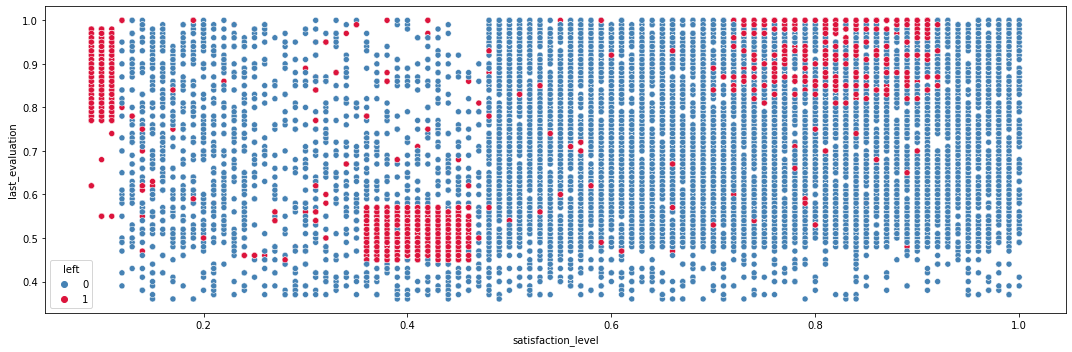

In [30]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.satisfaction_level,
            y=df.last_evaluation,
            hue=df.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with satisfaction level below 0.11 tend to leave the company. Employees with satisfaction level between 0.35 and 0.46 and with last evaluation between 0.44 and 0.57 tend to leave the company. Employees with satisfaction level between 0.71 and 0.92 and with last evaluation between 0.76 and 1 tend to leave the company.

**Number of Projects vs Last Evaluation**

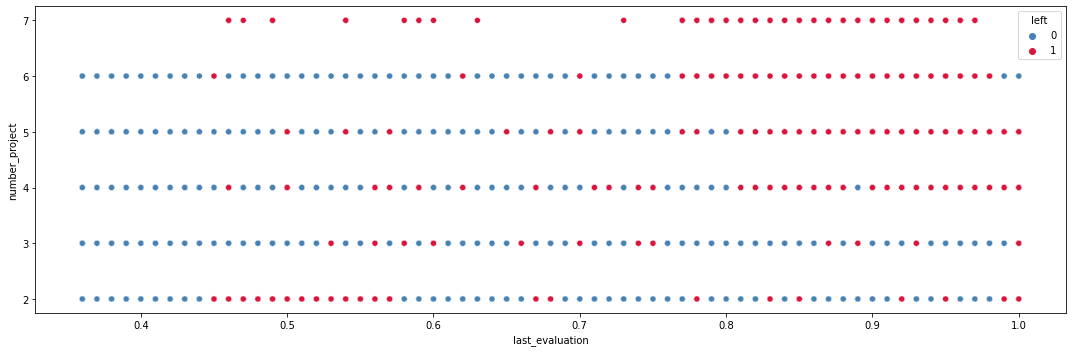

In [31]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.last_evaluation,
            y=df.number_project,
            hue=df.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with more than 4 projects seem to have higher evaluations but leave the company. Employees with 2 projects and a low evaluation leave the company.

**Last Evaluation vs Average Monthly Hours**

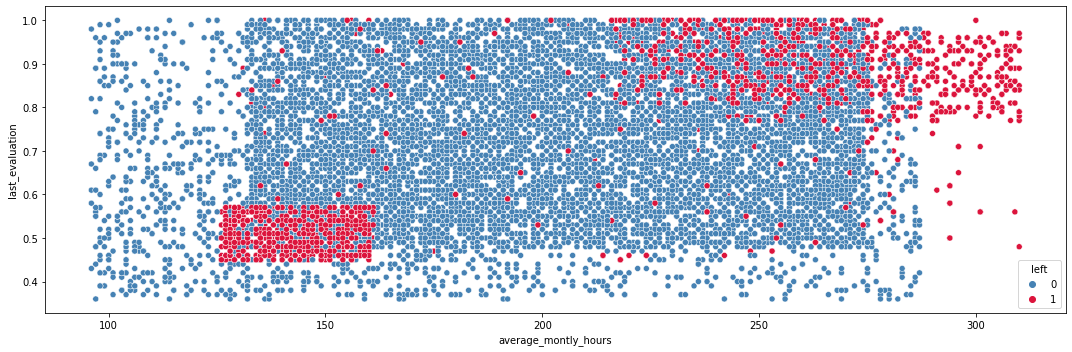

In [32]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.average_montly_hours,
            y=df.last_evaluation,
            hue=df.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with high evaluation and working more than 217 hours tend to leave the company. Employees with evaluation around 0.5 and working between 125 and 161 hours tend to leave the company.